# Compte rendu : le pendule 

### Elisa Leblond 21302500 

### Introduction :

Dans ce mini projet nous allons étudier le mouvement d'un pendule simple représenté ci dessous.

!["Schema du Pendule"](SchemaPendule.png)

## Approximation des petits angles :

On donne l'équation du mouvement libre telle que : 
$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
que l'on peut simplifier en utilisant l'approximation des petits angles :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

On pose $\Omega=\sqrt{{g/l}}$ la pulsation propre qui vaut ici 1 $\mathrm{rad\cdot s^{-1}}$. 

On fixe comme conditions initiales : On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$  et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

In [1]:
# importation des modules et des bibliothèque nécéssaires à la résolution du projet 
import numpy as np
import matplotlib.pyplot as plt
import math 

On définit les paramètres vixés.

In [2]:
#on définit les paramètres et les conditions initiales

dt = 0.05  #pas de temps
t_max = 20  #temps maximal
t_values = np.arange(0, t_max + dt, dt)  

#conditions initiales
theta_0 = np.radians(10)  # on convertit 10° en radians
theta_dot_0 = 0  #vitesse initiale

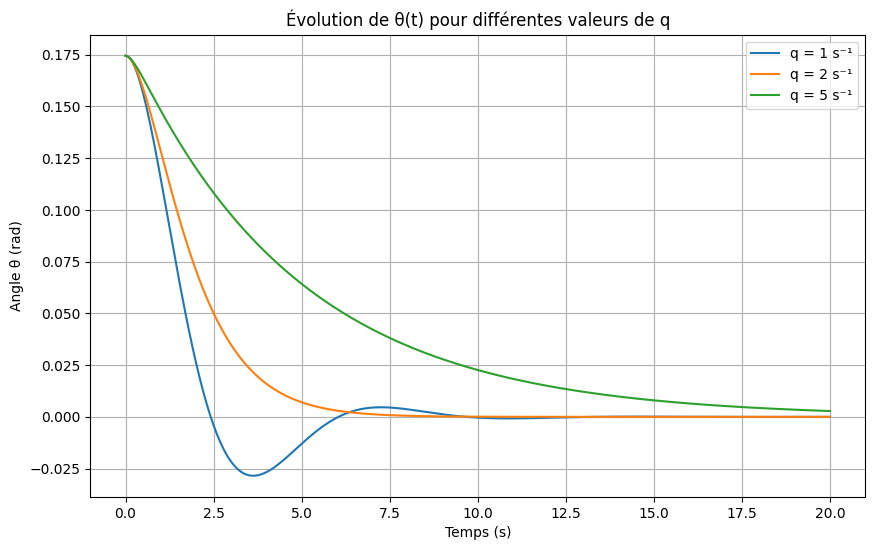

In [3]:
# Paramètres de l'équation
omega_0 = 1  # On fixe Omega_0 = 1 rad/s pour simplifier
q_values = [1, 2, 5]  # Différentes valeurs d'amortissement

# Définition de la fonction du système
def system(t, y, q, omega_0):
    theta, theta_dot = y
    dtheta_dt = theta_dot
    dtheta_dot_dt = -q * theta_dot - omega_0**2 * theta
    return np.array([dtheta_dt, dtheta_dot_dt])

# Implémentation de la méthode de Runge-Kutta d'ordre 4
def rk4(f, t, y, dt, q, omega_0):
    k1 = dt * f(t, y, q, omega_0)
    k2 = dt * f(t + dt/2, y + k1/2, q, omega_0)
    k3 = dt * f(t + dt/2, y + k2/2, q, omega_0)
    k4 = dt * f(t + dt, y + k3, q, omega_0)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Résolution pour différentes valeurs de q
plt.figure(figsize=(10, 6))
for q in q_values:
    y = np.array([theta_0, theta_dot_0])
    theta_values = []
    
    for t in t_values:
        theta_values.append(y[0])  # Stocke la position angulaire
        y = rk4(system, t, y, dt, q, omega_0)
    
    plt.plot(t_values, theta_values, label=f'q = {q} s⁻¹')

# Configuration du graphique
plt.xlabel("Temps (s)")
plt.ylabel("Angle θ (rad)")
plt.title("Évolution de θ(t) pour différentes valeurs de q")
plt.legend()
plt.grid()
plt.show()

### Analyse :

On remarque que à faible amortissement, pour q=1 le système oscille avant de s'arrêter. Pour q=2 il revient le plus rapidement possible à l'équilibre sans osciller. Pour q=5, il met plus de temps à s'annuler car il est "freiné" trop fortement

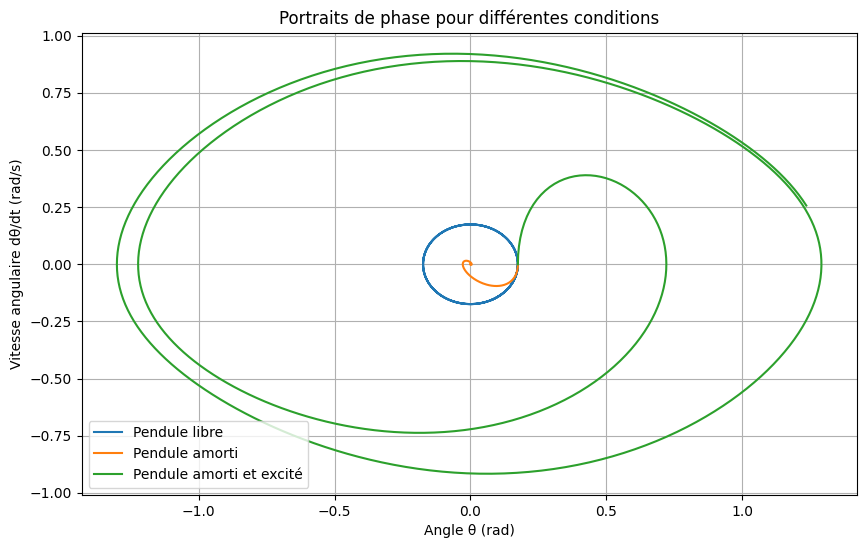

In [6]:
# Paramètres de l'équation
Fe = 1  # Amplitude de la force excitatrice
Omega_e = (2 / 3) * omega_0  # Pulsation de la force excitatrice

# Définition de la fonction du système avec excitation
def system(t, y, q, omega_0, Fe, Omega_e, forced):
    theta, theta_dot = y
    dtheta_dt = theta_dot
    dtheta_dot_dt = -q * theta_dot - omega_0**2 * np.sin(theta)
    if forced:
        dtheta_dot_dt += Fe * np.cos(Omega_e * t)  # Ajout de la force excitatrice
    return np.array([dtheta_dt, dtheta_dot_dt])

# Implémentation de la méthode de Runge-Kutta d'ordre 4
def rk4_2(f, t, y, dt, q, omega_0, Fe, Omega_e, forced):
    k1 = dt * f(t, y, q, omega_0, Fe, Omega_e, forced)
    k2 = dt * f(t + dt/2, y + k1/2, q, omega_0, Fe, Omega_e, forced)
    k3 = dt * f(t + dt/2, y + k2/2, q, omega_0, Fe, Omega_e, forced)
    k4 = dt * f(t + dt, y + k3, q, omega_0, Fe, Omega_e, forced)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Cas étudiés
cases = [(0, False, 'Pendule libre'), (1, False, 'Pendule amorti'), (1, True, 'Pendule amorti et excité')]

# Tracé des portraits de phase
plt.figure(figsize=(10, 6))

for q, forced, label in cases:
    y = np.array([theta_0, theta_dot_0])
    theta_values = []
    theta_dot_values = []
    
    for t in t_values:
        theta_values.append(y[0])  # Stocke la position angulaire
        theta_dot_values.append(y[1])  # Stocke la vitesse angulaire
        y = rk4_2(system, t, y, dt, q, omega_0, Fe, Omega_e, forced)
    
    plt.plot(theta_values, theta_dot_values, label=label)

# Configuration du graphique
plt.xlabel('Angle θ (rad)')
plt.ylabel('Vitesse angulaire dθ/dt (rad/s)')
plt.title("Phase pour différentes conditions")
plt.legend()
plt.grid()
plt.show()


### Analyse des portraits de phase

1. **Pendule libre (q=0, Fe=0)**
   - La trajectoire est une courbe fermée, indiquant une oscillation régulière et conservatrice.
   - L'absence d'amortissement signifie que l'énergie reste constante.

2. **Pendule amorti (q=1, Fe=0)**
   - La trajectoire forme une spirale qui converge progressivement vers l'origine.
   - L'effet de l'amortissement dissipe l'énergie, entraînant un retour à l'équilibre sans oscillation permanente.

3. **Pendule amorti et excité (q=1, Fe=1)**
   - La trajectoire est plus complexe et ne converge pas vers un point fixe.
   - La force excitatrice introduit un comportement quasi-périodique, maintenant un mouvement oscillatoire malgré l'amortissement.
   - Ce type de comportement peut conduire à des phénomènes de résonance si la fréquence de l'excitation est proche de la fréquence propre du système.

